# SUPERVISED LEARNING - CLASSIFICATION

In [75]:
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] =="male"
X = df[["Pclass", "male", "Age", "Siblings/Spouses","Parents/Children", "Fare"]].values
y = df['Survived'].values
# print(X) # it's standard practice to call 2nd array of X and 1d array of Y
# print(y)

# Logictic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
# build model using Fare and Age columns
X = df[['Fare', "Age"]].values
y = df['Survived'].values

In [30]:
# use the fit method to build the model
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# coef_ and intercept_ attributes
print(model.coef_, model.intercept_)
# it means 0 = 0.01615949x - 0.01549065y - 0.51037152

[[ 0.01615949 -0.01549065]] [-0.51037152]


In [32]:
# build model using all columns
X = df[["Pclass", "male", "Age", "Siblings/Spouses","Parents/Children", "Fare"]].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X,y)
#  make predictions for the first 5 rows:
model.predict((X[:5]))

array([0, 1, 1, 1, 0], dtype=int64)

In [33]:
# target array:
print(y[:5])

[0 1 1 1 0]


In [34]:
# the 1 passenger in the datasets:
X[0]

array([3, True, 22.0, 1, 0, 7.25], dtype=object)

In [35]:
# model prediction:
print(model.predict([[3, True, 22.0, 1, 0, 7.25]]))
# target array:
print(y[0])

[0]
0


### Evaluation matrix

In [36]:
# Accuracy score: counting the number of datapoints the model predicts correctly
model.score(X,y)

0.8049605411499436

In [38]:
# Accuracy, Precision, Recal and F1 score
y_pred = model.predict(X)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: ", accuracy_score(y,y_pred))
print("Precision: ", precision_score(y,y_pred))
print("Recall: ", recall_score(y, y_pred))
print("f1 score: ", f1_score(y,y_pred))

Accuracy:  0.8049605411499436
Precision:  0.7734627831715211
Recall:  0.6988304093567251
f1 score:  0.7342549923195083


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)
# the result means 475 actual negative - pred negative, 70 actual neg - pred- neg
# 103 actual pos - pred pos, 239 actual pos - pred pos

array([[475,  70],
       [103, 239]], dtype=int64)

In [40]:
# Sensitivity and Specificity
from sklearn.metrics import recall_score
sensitivity_score = recall_score
sensitivity_score(y, y_pred)

0.6988304093567251

In [41]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y, y_pred)

(array([0.82179931, 0.77346278]),
 array([0.87155963, 0.69883041]),
 array([0.84594835, 0.73425499]),
 array([545, 342], dtype=int64))

In [44]:
specificity_score = precision_recall_fscore_support(y, y_pred)[2][0]
print(specificity_score)

0.8459483526268923


### Model evaluation

In [48]:
# Foundation for the ROC curve:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("predict proba:")
print(model.predict_proba(X_test)[0])
# The first value is the probability that the datapoint is in the 0 class (didn’t survive)
# the second is the probability that the datapoint is in the 1 class (survived)

predict proba:
[0.32676771 0.67323229]


In [45]:
# Model evaluation: the ROC curve
# Area Under the Curve (AUC score): the higher the AUC score, the better model
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))


model 1 AUC score: 0.8104359885585508
model 1 AUC score: 0.783435901880905


### K fold cross validation 

In [51]:
from sklearn.model_selection import KFold
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

kf = KFold(n_splits=3, shuffle=True) # 3 Sets of data, in each set auto split 80 train - 20 test data

splits = list(kf.split(X))
first_split = splits[0]
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

training set indices: [1 2 4 5]
test set indices: [0 3]
X_train
[[38.     71.2833]
 [26.      7.925 ]
 [35.      8.05  ]
 [27.      8.4583]]
y_train [1 1 0 0]
X_test
[[22.    7.25]
 [35.   53.1 ]]
y_test [0 1]


In [52]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

[0.7640449438202247, 0.8258426966292135, 0.807909604519774, 0.8022598870056498, 0.8022598870056498]


C:\Users\thuyq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
import numpy as np
print(np.mean(scores))

0.8004634037961024


### Model comparision

In [58]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

Logistic Regression with all features
accuracy: 0.8049196978353331
precision: 0.7760626261779253
recall: 0.6982311403807198
f1 score: 0.7331856256966469

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7891576207706469
precision: 0.7425594780823722
recall: 0.6887467407450838
f1 score: 0.7140755236399094

Logistic Regression with Fare & Age features
accuracy: 0.6583761823144798
precision: 0.6681883116883116
recall: 0.2427785546338756
f1 score: 0.35363627400894476


In [59]:
# Now that we’ve made a choice of a best model, we build a single final model using all of the data.
model = LogisticRegression()
model.fit(X1, y)
model.predict([[3, False, 25, 0, 1, 2]]) 

array([1], dtype=int64)

### Note

In [56]:
# build model with breast cancer data
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']


In [20]:
X = df[cancer_data.feature_names].values
y = df['target'].values
model = LogisticRegression()
model.fit(X,y)

C:\Users\thuyq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Convergence warning.
model = LogisticRegression(solver = "liblinear")
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model.predict([X[0]])

array([0])

In [25]:
model.score(X,y)

0.9595782073813708

# Decision Tree Model

In [60]:
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] =="male"
X = df[["Pclass", "male", "Age", "Siblings/Spouses","Parents/Children", "Fare"]].values
y = df['Survived'].values

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model= DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 22)
model.fit(X_train, y_train)
model.predict([[3, True, 22, 1, 0, 7.25]])


array([0], dtype=int64)

### Gini vs Entropy

In [61]:
# The default impurity criterion in scikit-learn’s Decision Tree algorithm is the Gini Impurity.
kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall))

Decision Tree - gini
accuracy: 0.7789627372563955
precision: 0.7046168092922365
recall: 0.7292546883856181
Decision Tree - entropy
accuracy: 0.78027677267822
precision: 0.7239637904468413
recall: 0.7015622580173935


### Visualizing decision trees

In [71]:
# pip install graphviz

In [70]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

'tree.png'

### Pre-pruning parameters

In [73]:
# max_depth parameter to limit the number of steps the tree can have between the root node and the leaf nodes.
# min_samples_leaf parameter to tell the model to stop building the tree early if the number of datapoints in a leaf will be below a threshold.
# max_leaf_nodes to set a limit on the number of leaf nodes in the tree.
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf= 2, max_leaf_nodes = 10)

### Grid search

In [74]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}
dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)
print("best score:", gs.best_score_)

best params: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
best score: 0.7709600688632559


# Random forest

In [76]:
# Random forest: a model built with multiple trees
# Bootstrapped sample is a random sample of datapoints where we randomly select with replacement datapoints from our original dataset to create a dataset of the same size.
# Bootstrap Aggregation (or Bagging) creates an ensemble from multiple models built on bootstrapped samples.
# Decorrelating the trees:add some restrictions to the model when building each decision tree so the trees have more variation.
# We bag these decision trees, we get a random forest

In [79]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])


prediction: [1]
true value: 1


In [80]:
# use the score method to calculate the accuracy over the whole test set
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.972027972027972


In [81]:
# compare to the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.916083916083916


### Elbow graph

In [84]:
# Elbow Graph is a model that optimizes performance without adding unnecessary complexity
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']
scores

array([0.92974693, 0.91212545, 0.93850334, 0.9279615 , 0.9437665 ,
       0.94727527, 0.95437044, 0.94378202, 0.95255395, 0.95783263,
       0.95960255, 0.95783263, 0.94904518, 0.95784816, 0.95256948,
       0.95083062, 0.96840553, 0.95253843, 0.95783263, 0.9648657 ,
       0.96489676, 0.95607825, 0.96135693, 0.96134141, 0.95609377,
       0.95607825, 0.95255395, 0.95783263, 0.95609377, 0.95786369,
       0.95433939, 0.95433939, 0.95609377, 0.95960255, 0.95958702,
       0.95255395, 0.96311132, 0.96135693, 0.95607825, 0.95781711,
       0.96135693, 0.95607825, 0.96311132, 0.95609377, 0.95960255,
       0.96488123, 0.95783263, 0.96309579, 0.95783263, 0.95958702,
       0.95784816, 0.96309579, 0.95609377, 0.95609377, 0.96137246,
       0.95960255, 0.95960255, 0.95960255, 0.97014439, 0.96314237,
       0.95432386, 0.9648657 , 0.96488123, 0.95784816, 0.95958702,
       0.95784816, 0.95432386, 0.96311132, 0.95960255, 0.96308027,
       0.96135693, 0.95958702, 0.95958702, 0.96311132, 0.95607

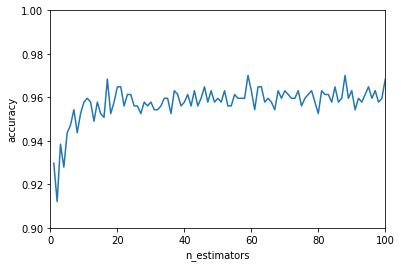

In [85]:
# use matplotlib to graph the results
import matplotlib.pyplot as plt

scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

In [86]:
# If we look at this graph, we see that around 10 trees the graph levels out. The best model occurred at n_estimators=33 and n_estimators=64, but given how volatile it is, that was probably due to random chance. We should choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance
# Build random forest model with the optimal number of trees
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Feature Importance

In [87]:
# which subset of features should we use? This is a matter of feature selection.
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)
print(ft_imp.head(10))

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64


In [88]:
# New model on selected features
# In our dataset, we happen to notice that features with "worst" seem to have higher importances. As a result we are going to build a new model with the selected features and see if it improves accuracy.

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

rf = RandomForestClassifier(n_estimators=10, random_state=111)

worst_cols = [col for col in df.columns if 'worst' in col]
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.972027972027972
